In [10]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [22]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
#df_da_us = df[df['salary_year_avg'].notna()]['salary_year_avg'].sort_values(ascending=True)

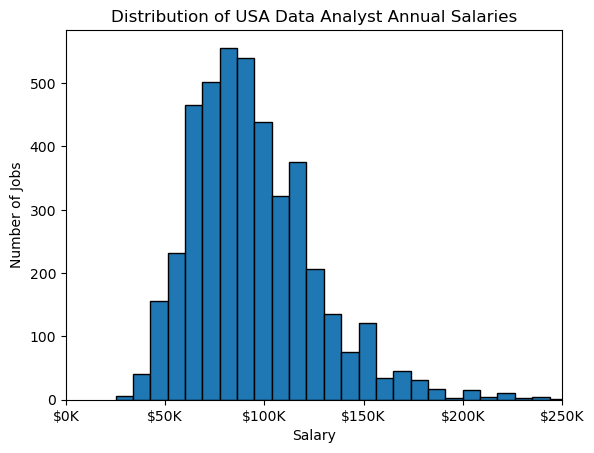

In [34]:
from matplotlib.ticker import FuncFormatter

df_da_us['salary_year_avg'].plot(kind='hist',bins=40, edgecolor='black')

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${int(x/1000)}K"))

plt.xlim((0,250_000))

plt.xlabel('Salary')
plt.ylabel('Number of Jobs')
plt.title("Distribution of USA Data Analyst Annual Salaries")
plt.show()